In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

import random
import re   
import string                          

import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords          
from nltk.stem import PorterStemmer        
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
# Load Data
data = pd.read_csv('processed_emotions_extended.csv')

In [3]:
data.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,surprise,neutral,POS_Tags,Named_Entities,Dependencies,Lemmas,Sentiment_Score,TF_IDF,Pretrained_Embeddings,Custom_Embeddings
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,"[('That', 'DET'), ('game', 'NOUN'), ('hurt', '...",[],"[('That', 'det'), ('game', 'nsubj'), ('hurt', ...","['that', 'game', 'hurt', '.']",-0.400000,"(0, 2222)\t0.7588775\n (0, 1863)\t0.5851774...",[ 0.01412433 0.14903767 0.6302814 -0.665636...,[-0.5551202 -0.33853224 0.01570667 1.609972...
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,"[(' ', 'SPACE'), ('>', 'PROPN'), ('sexuality',...",[],"[(' ', 'dep'), ('>', 'dep'), ('sexuality', 'ns...","[' ', '>', 'sexuality', 'should', 'not', 'be',...",0.000000,"(0, 3037)\t0.11983278\n (0, 1222)\t0.349715...",[-8.43283981e-02 3.18639606e-01 6.20691419e-...,[-0.69747406 0.14589307 0.15127726 0.393505...
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,1,"[('You', 'PRON'), ('do', 'VERB'), ('right', 'A...",[],"[('You', 'nsubj'), ('do', 'ccomp'), ('right', ...","['you', 'do', 'right', ',', 'if', 'you', 'do',...",-0.107143,"(0, 1489)\t0.4888419\n (0, 1841)\t0.3566968...",[-0.18868257 0.2714935 0.45902443 -0.625163...,[-0.3800924 -0.32767338 0.3865455 -0.087995...
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,0,0,"[('Man', 'INTJ'), ('I', 'PRON'), ('love', 'VER...",[],"[('Man', 'intj'), ('I', 'nsubj'), ('love', 'RO...","['man', 'I', 'love', 'reddit', '.']",0.500000,"(0, 3579)\t0.6891295\n (0, 2661)\t0.4681055...",[ 0.06597333 0.02082666 0.24056667 -0.406583...,[ 0.58678466 0.42585954 -0.40907535 0.368751...
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,1,"[('[', 'X'), ('NAME', 'X'), (']', 'PUNCT'), ('...","[('Falcon', 'ORG')]","[('[', 'dep'), ('NAME', 'nsubj'), (']', 'nsubj...","['[', 'name', ']', 'be', 'nowhere', 'near', 't...",0.100000,"(0, 695)\t0.3038367\n (0, 2076)\t0.23401506...",[-0.0040315 -0.24196032 0.3554318 -0.233655...,[-0.3301639 -0.25663218 0.8855103 0.229822...


In [4]:
def clean_text(text):
    text = str(text).lower().strip()
    text = re.sub(r'[^a-zA-Z ]', '', text)  # Remove special characters
    return text

In [5]:
data['text'].astype(str)

0                                           That game hurt.
1          >sexuality shouldn’t be a grouping category I...
2            You do right, if you don't care then fuck 'em!
3                                        Man I love reddit.
4         [NAME] was nowhere near them, he was by the Fa...
                                ...                        
211220                               Everyone likes [NAME].
211221    Well when you’ve imported about a gazillion of...
211222                                   That looks amazing
211223    The FDA has plenty to criticize. But like here...
211224    Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...
Name: text, Length: 211225, dtype: object

In [6]:
data['clean_text'] = data['text'].apply(clean_text)

In [7]:
data.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,neutral,POS_Tags,Named_Entities,Dependencies,Lemmas,Sentiment_Score,TF_IDF,Pretrained_Embeddings,Custom_Embeddings,clean_text
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,"[('That', 'DET'), ('game', 'NOUN'), ('hurt', '...",[],"[('That', 'det'), ('game', 'nsubj'), ('hurt', ...","['that', 'game', 'hurt', '.']",-0.400000,"(0, 2222)\t0.7588775\n (0, 1863)\t0.5851774...",[ 0.01412433 0.14903767 0.6302814 -0.665636...,[-0.5551202 -0.33853224 0.01570667 1.609972...,that game hurt
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,"[(' ', 'SPACE'), ('>', 'PROPN'), ('sexuality',...",[],"[(' ', 'dep'), ('>', 'dep'), ('sexuality', 'ns...","[' ', '>', 'sexuality', 'should', 'not', 'be',...",0.000000,"(0, 3037)\t0.11983278\n (0, 1222)\t0.349715...",[-8.43283981e-02 3.18639606e-01 6.20691419e-...,[-0.69747406 0.14589307 0.15127726 0.393505...,sexuality shouldnt be a grouping category it m...
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,1,"[('You', 'PRON'), ('do', 'VERB'), ('right', 'A...",[],"[('You', 'nsubj'), ('do', 'ccomp'), ('right', ...","['you', 'do', 'right', ',', 'if', 'you', 'do',...",-0.107143,"(0, 1489)\t0.4888419\n (0, 1841)\t0.3566968...",[-0.18868257 0.2714935 0.45902443 -0.625163...,[-0.3800924 -0.32767338 0.3865455 -0.087995...,you do right if you dont care then fuck em
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,0,"[('Man', 'INTJ'), ('I', 'PRON'), ('love', 'VER...",[],"[('Man', 'intj'), ('I', 'nsubj'), ('love', 'RO...","['man', 'I', 'love', 'reddit', '.']",0.500000,"(0, 3579)\t0.6891295\n (0, 2661)\t0.4681055...",[ 0.06597333 0.02082666 0.24056667 -0.406583...,[ 0.58678466 0.42585954 -0.40907535 0.368751...,man i love reddit
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,1,"[('[', 'X'), ('NAME', 'X'), (']', 'PUNCT'), ('...","[('Falcon', 'ORG')]","[('[', 'dep'), ('NAME', 'nsubj'), (']', 'nsubj...","['[', 'name', ']', 'be', 'nowhere', 'near', 't...",0.100000,"(0, 695)\t0.3038367\n (0, 2076)\t0.23401506...",[-0.0040315 -0.24196032 0.3554318 -0.233655...,[-0.3301639 -0.25663218 0.8855103 0.229822...,name was nowhere near them he was by the falcon


In [8]:
# Define emotion labels
emotion_mapping = {
    "happiness": [
        "joy", "optimism", "approval", "pride", "gratitude",
        "love", "excitement", "caring", "relief", "admiration",
        "amusement", "desire"
    ],
    "sadness": [
        "disappointment", "remorse", "grief", "sadness"
    ],
    "anger": [
        "anger", "annoyance", "disapproval"
    ],
    "disgust": [
        "disgust"
    ],
    "fear": [
        "fear", "nervousness"
    ],
    "surprise": [
        "surprise", "realization"
    ],
    "neutral": [
        "neutral"
    ]
}

In [43]:
def map_emotions(row):
    for primary_emotion, sub_emotions in emotion_mapping.items():
        for sub_emotion in sub_emotions:
            if sub_emotion in data.columns and row[sub_emotion] == 1:
                return primary_emotion
    return "neutral"  # Default to neutral if no match

In [44]:
data['emotion_label'] = data.apply(map_emotions, axis=1)

In [45]:
# Convert emotion labels to numerical values
emotion_labels = list(emotion_mapping.keys())
data['emotion_label'] = data['emotion_label'].apply(lambda x: emotion_labels.index(x))

In [46]:
# Ensure correct tick labels for Confusion Matrix
emotion_label_names = [label.capitalize() for label in emotion_labels]

In [47]:
data.head(10)

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,POS_Tags,Named_Entities,Dependencies,Lemmas,Sentiment_Score,TF_IDF,Pretrained_Embeddings,Custom_Embeddings,clean_text,emotion_label
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,"[('That', 'DET'), ('game', 'NOUN'), ('hurt', '...",[],"[('That', 'det'), ('game', 'nsubj'), ('hurt', ...","['that', 'game', 'hurt', '.']",-0.400000,"(0, 2222)\t0.7588775\n (0, 1863)\t0.5851774...",[ 0.01412433 0.14903767 0.6302814 -0.665636...,[-0.5551202 -0.33853224 0.01570667 1.609972...,that game hurt,1
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,"[(' ', 'SPACE'), ('>', 'PROPN'), ('sexuality',...",[],"[(' ', 'dep'), ('>', 'dep'), ('sexuality', 'ns...","[' ', '>', 'sexuality', 'should', 'not', 'be',...",0.000000,"(0, 3037)\t0.11983278\n (0, 1222)\t0.349715...",[-8.43283981e-02 3.18639606e-01 6.20691419e-...,[-0.69747406 0.14589307 0.15127726 0.393505...,sexuality shouldnt be a grouping category it m...,6
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,"[('You', 'PRON'), ('do', 'VERB'), ('right', 'A...",[],"[('You', 'nsubj'), ('do', 'ccomp'), ('right', ...","['you', 'do', 'right', ',', 'if', 'you', 'do',...",-0.107143,"(0, 1489)\t0.4888419\n (0, 1841)\t0.3566968...",[-0.18868257 0.2714935 0.45902443 -0.625163...,[-0.3800924 -0.32767338 0.3865455 -0.087995...,you do right if you dont care then fuck em,6
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,"[('Man', 'INTJ'), ('I', 'PRON'), ('love', 'VER...",[],"[('Man', 'intj'), ('I', 'nsubj'), ('love', 'RO...","['man', 'I', 'love', 'reddit', '.']",0.500000,"(0, 3579)\t0.6891295\n (0, 2661)\t0.4681055...",[ 0.06597333 0.02082666 0.24056667 -0.406583...,[ 0.58678466 0.42585954 -0.40907535 0.368751...,man i love reddit,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,"[('[', 'X'), ('NAME', 'X'), (']', 'PUNCT'), ('...","[('Falcon', 'ORG')]","[('[', 'dep'), ('NAME', 'nsubj'), (']', 'nsubj...","['[', 'name', ']', 'be', 'nowhere', 'near', 't...",0.100000,"(0, 695)\t0.3038367\n (0, 2076)\t0.23401506...",[-0.0040315 -0.24196032 0.3554318 -0.233655...,[-0.3301639 -0.25663218 0.8855103 0.229822...,name was nowhere near them he was by the falcon,6
5,Right? Considering it’s such an important docu...,eespn2i,ImperialBoss,TrueReddit,t3_aizyuz,t1_eesoak0,1.548280e+09,61,False,0,...,"[('Right', 'INTJ'), ('?', 'PUNCT'), ('Consider...",[],"[('Right', 'ROOT'), ('?', 'punct'), ('Consider...","['right', '?', 'consider', 'it', '’', 'such', ...",0.233929,"(0, 2107)\t0.24507914\n (0, 1786)\t0.131669...",[-0.09053125 0.18813467 0.45793253 -0.304748...,[-0.18190685 0.13065338 0.8153044 0.335732...,right considering its such an important docume...,0
6,"He isn't as big, but he's still quite popular....",eczuekb,Rallings,cringe,t3_abeksv,t1_eczsmp8,1.546320e+09,3,False,0,...,"[('He', 'PRON'), ('is', 'AUX'), (""n't"", 'PART'...",[],"[('He', 'nsubj'), ('is', 'ROOT'), (""n't"", 'neg...","['he', 'be', 'not', 'as', 'big', ',', 'but', '...",0.200000,"(0, 2904)\t0.19077632\n (0, 2135)\t0.182398...",[-3.36449631e-02 1.61177516e-01 3.62908304e-...,[-0.7810541 -0.04986187 0.96388155 0.619172...,he isnt as big but hes still quite popular ive...,2
7,That's crazy; I went to a super [RELIGION] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,1.546536e+09,23,False,0,...,"[('That', 'PRON'), (""'s"", 'AUX'), ('crazy', 'A...","[('2', 'CARDINAL'), ('the entire 4 years', 'DA...","[('That', 'nsubj'), (""'s"", 'ccomp'), ('crazy',...","['that', 'be', 'crazy', ';', 'I', 'go', 'to', ...",-0.021333,"(0, 2866)\t0.33613288\n (0, 4390)\t0.325776...",[ 0.13591242 0.24479464 0.33120346 -0.3

In [21]:
# NLP Features Extraction
vectorizer_tfidf = TfidfVectorizer()
vectorizer_count = CountVectorizer()

X_tfidf = vectorizer_tfidf.fit_transform(data['clean_text'])
X_count = vectorizer_count.fit_transform(data['clean_text'])

In [22]:
# Include additional NLP features
sentiment_scores = data[['Sentiment_Score']].values 

In [23]:
data.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,POS_Tags,Named_Entities,Dependencies,Lemmas,Sentiment_Score,TF_IDF,Pretrained_Embeddings,Custom_Embeddings,clean_text,emotion_label
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,"[('That', 'DET'), ('game', 'NOUN'), ('hurt', '...",[],"[('That', 'det'), ('game', 'nsubj'), ('hurt', ...","['that', 'game', 'hurt', '.']",-0.400000,"(0, 2222)\t0.7588775\n (0, 1863)\t0.5851774...",[ 0.01412433 0.14903767 0.6302814 -0.665636...,[-0.5551202 -0.33853224 0.01570667 1.609972...,that game hurt,sadness
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,"[(' ', 'SPACE'), ('>', 'PROPN'), ('sexuality',...",[],"[(' ', 'dep'), ('>', 'dep'), ('sexuality', 'ns...","[' ', '>', 'sexuality', 'should', 'not', 'be',...",0.000000,"(0, 3037)\t0.11983278\n (0, 1222)\t0.349715...",[-8.43283981e-02 3.18639606e-01 6.20691419e-...,[-0.69747406 0.14589307 0.15127726 0.393505...,sexuality shouldnt be a grouping category it m...,neutral
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,"[('You', 'PRON'), ('do', 'VERB'), ('right', 'A...",[],"[('You', 'nsubj'), ('do', 'ccomp'), ('right', ...","['you', 'do', 'right', ',', 'if', 'you', 'do',...",-0.107143,"(0, 1489)\t0.4888419\n (0, 1841)\t0.3566968...",[-0.18868257 0.2714935 0.45902443 -0.625163...,[-0.3800924 -0.32767338 0.3865455 -0.087995...,you do right if you dont care then fuck em,neutral
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,"[('Man', 'INTJ'), ('I', 'PRON'), ('love', 'VER...",[],"[('Man', 'intj'), ('I', 'nsubj'), ('love', 'RO...","['man', 'I', 'love', 'reddit', '.']",0.500000,"(0, 3579)\t0.6891295\n (0, 2661)\t0.4681055...",[ 0.06597333 0.02082666 0.24056667 -0.406583...,[ 0.58678466 0.42585954 -0.40907535 0.368751...,man i love reddit,happiness
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,"[('[', 'X'), ('NAME', 'X'), (']', 'PUNCT'), ('...","[('Falcon', 'ORG')]","[('[', 'dep'), ('NAME', 'nsubj'), (']', 'nsubj...","['[', 'name', ']', 'be', 'nowhere', 'near', 't...",0.100000,"(0, 695)\t0.3038367\n (0, 2076)\t0.23401506...",[-0.0040315 -0.24196032 0.3554318 -0.233655...,[-0.3301639 -0.25663218 0.8855103 0.229822...,name was nowhere near them he was by the falcon,neutral


In [24]:
# Merge all features
scaler = MinMaxScaler()
X_combined = scaler.fit_transform(np.hstack((X_tfidf.toarray(), X_count.toarray(), sentiment_scores)))

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, data['emotion_label'], test_size=0.2, random_state=42)

In [26]:
# Naive Bayes
nb = MultinomialNB()

In [27]:
nb.fit(X_train, y_train)

MultinomialNB()

In [28]:
y_pred_nb = nb.predict(X_test)

In [29]:
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')
print("F1-score:", nb_f1)

F1-score: 0.5115946152768615


In [30]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", nb_accuracy)

Accuracy: 0.5345011243934193


In [31]:
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
print("Precision:", nb_precision)

Precision: 0.5050655507774621


In [32]:
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
print("Recall:", nb_recall)

Recall: 0.5345011243934193


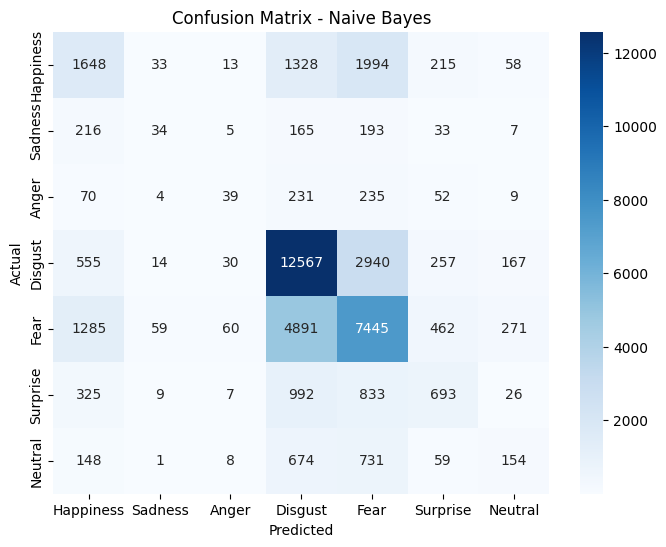

In [50]:
# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_label_names, yticklabels=emotion_label_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()